In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from os.path import join
import os
import random
from functools import partial
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, concatenate
from keras.optimizers import Nadam
from keras.layers.advanced_activations import ELU
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.backend import binary_crossentropy

import tensorflow as tf

K.clear_session()
K.set_image_dim_ordering('tf')

print(K.image_data_format())
smooth = 1e-12
num_examples = 0

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


channels_last


In [2]:

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)



In [3]:
# def preprocess(image, gray):
#     mask = np.ones((512,512), dtype="uint8") * 255
#     nu=0
#     _, contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     for i, c in enumerate(contours):
#         area = int(cv2.contourArea(c))
#         if area <10:
            
#             if nu<1:
#                 print(area)
#                 nu=nu+1
#                 cv2.drawContours(mask, [c], -1, 0, -1)
#     image = cv2.bitwise_and(image, image, mask=mask)
#     return image

In [4]:
def preprocess(image, gray):
    ret, gray = cv2.threshold(gray, 250, 255,0)
    imageha, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(largest_areas[-1])
    mask = np.zeros((512,512),dtype= np.uint8)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    return mask

In [5]:
model = load_model('modeltr.h5', custom_objects={'jaccard_coef_int': jaccard_coef_int,'jaccard_coef_loss': jaccard_coef_loss})

In [ ]:
def savemaskimg(mask):
    plt.

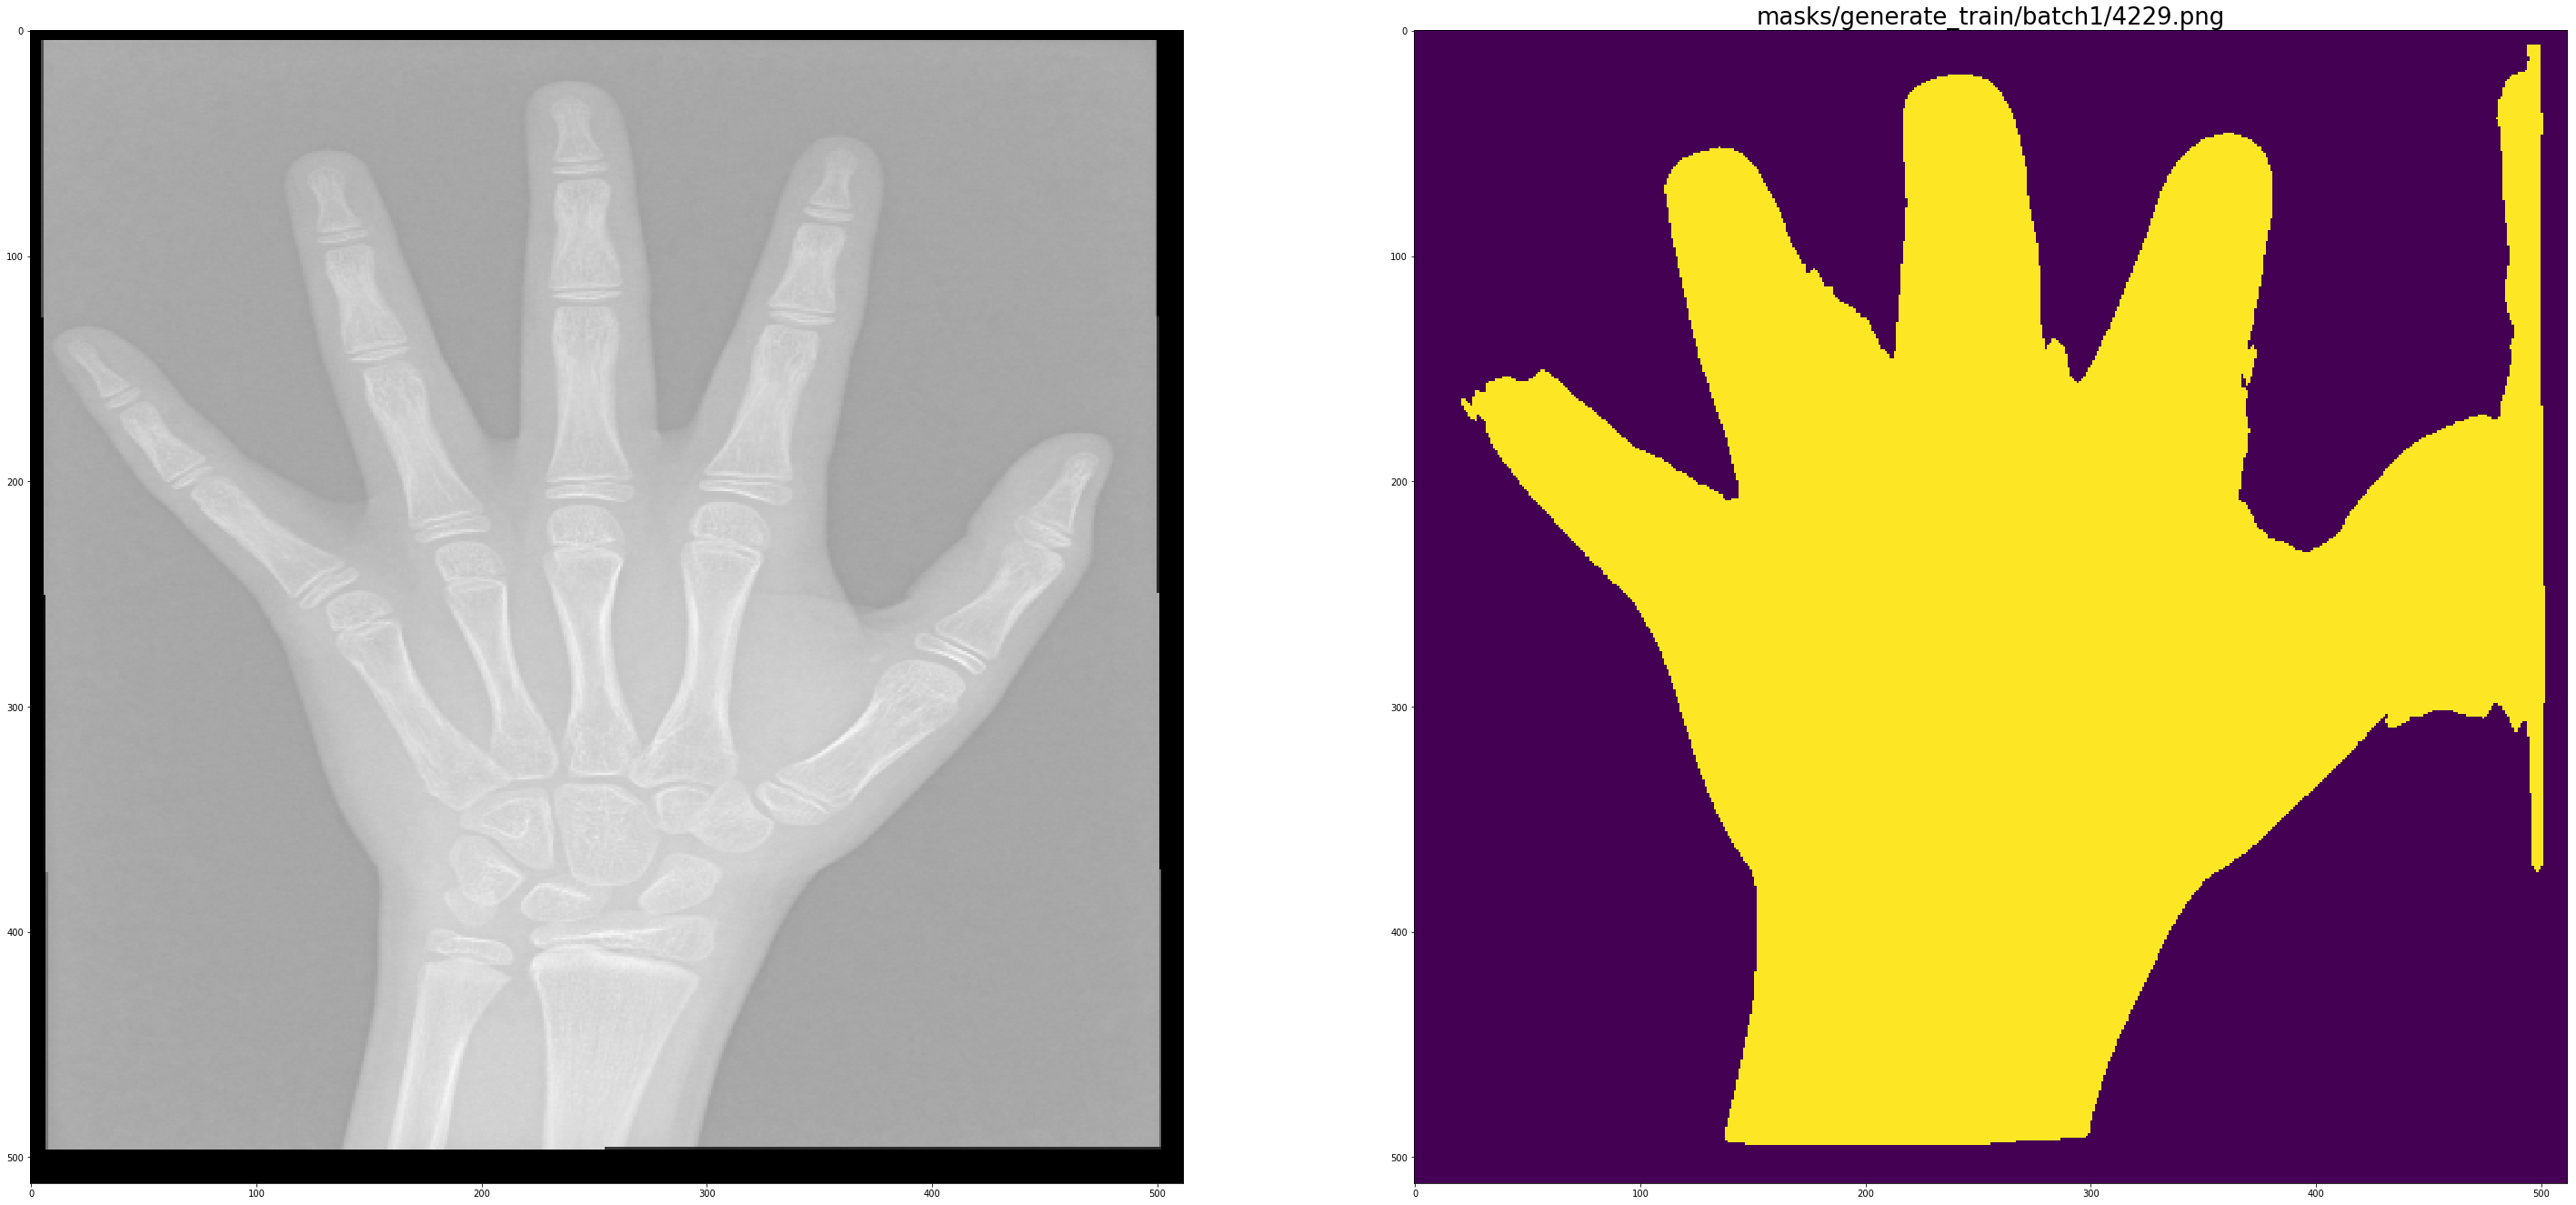

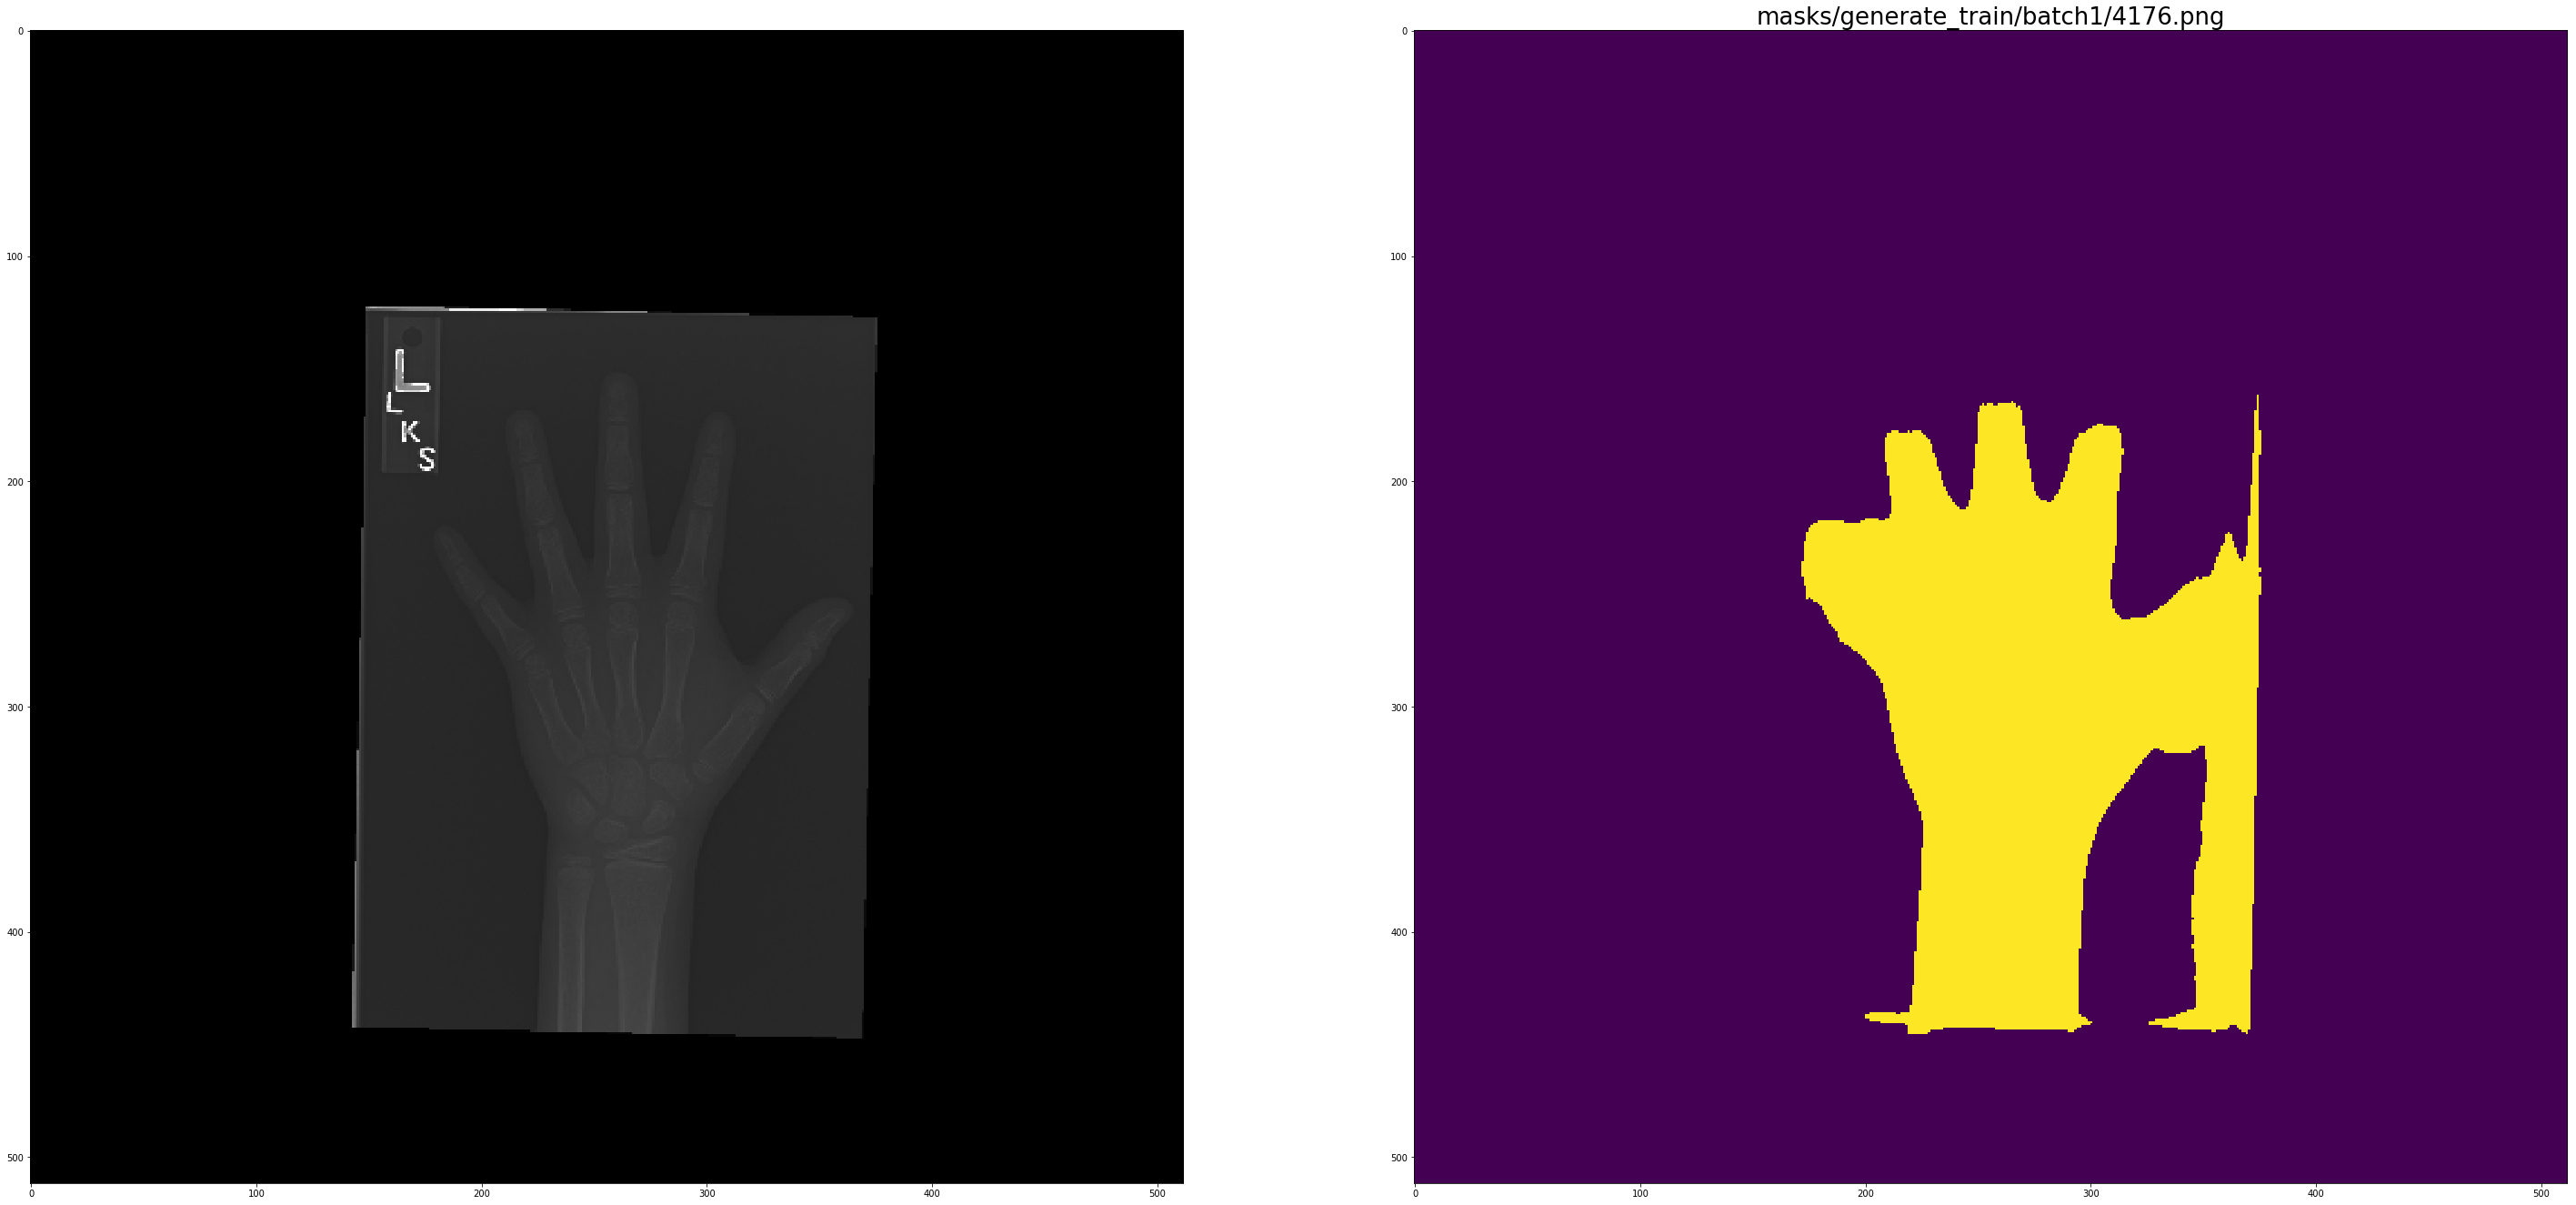

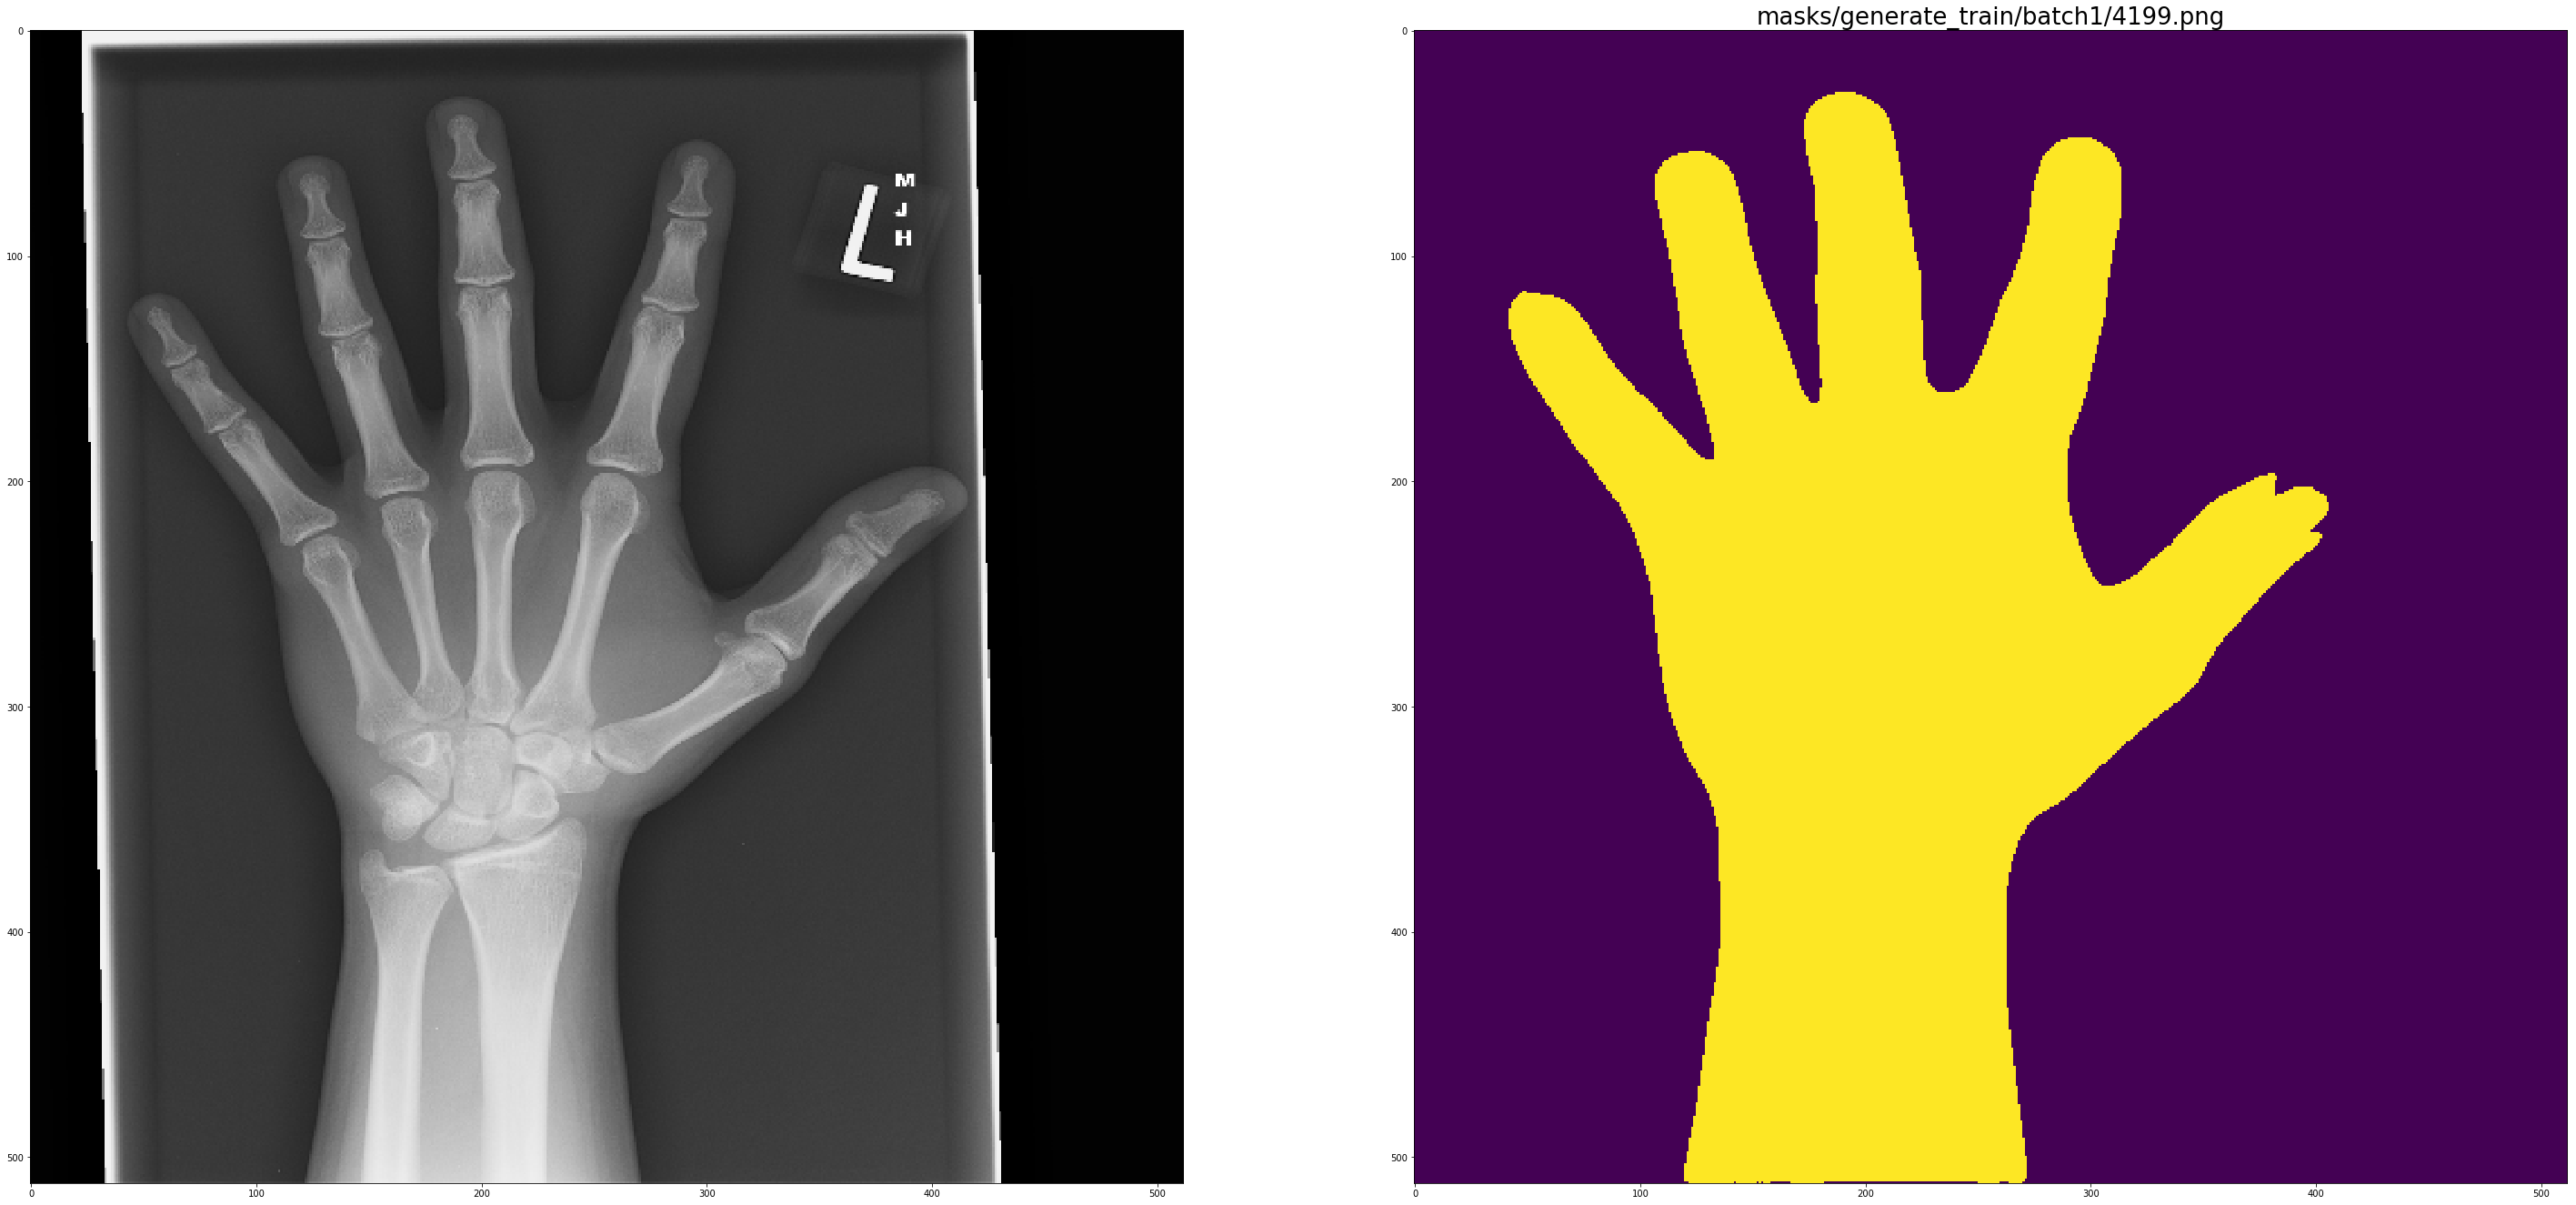

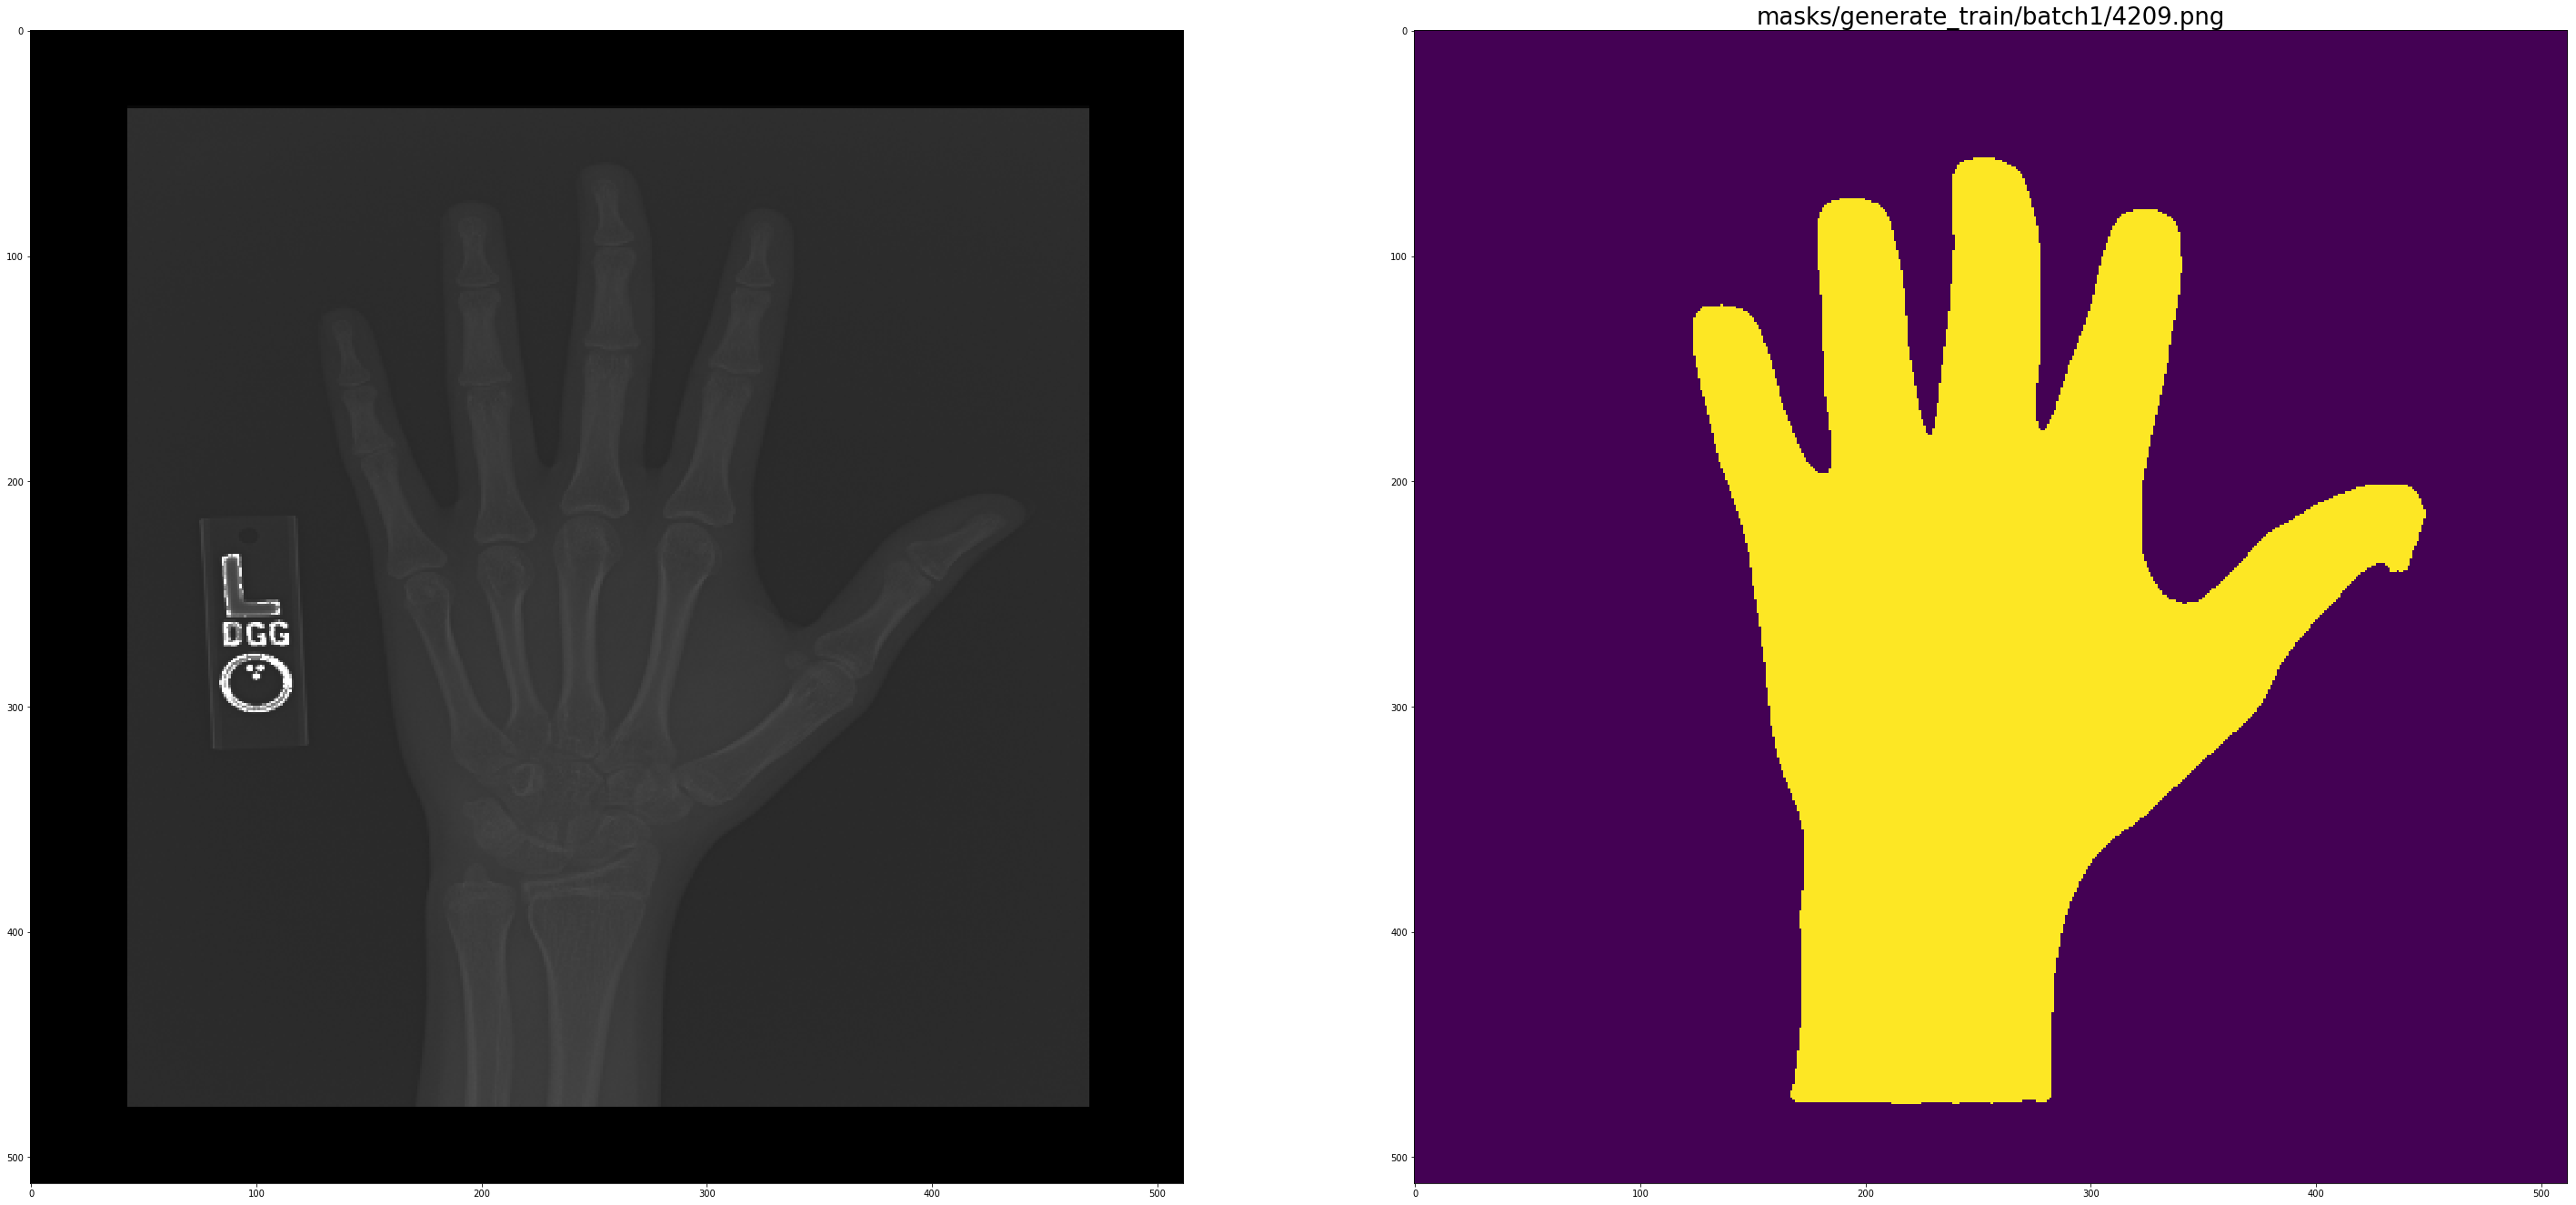

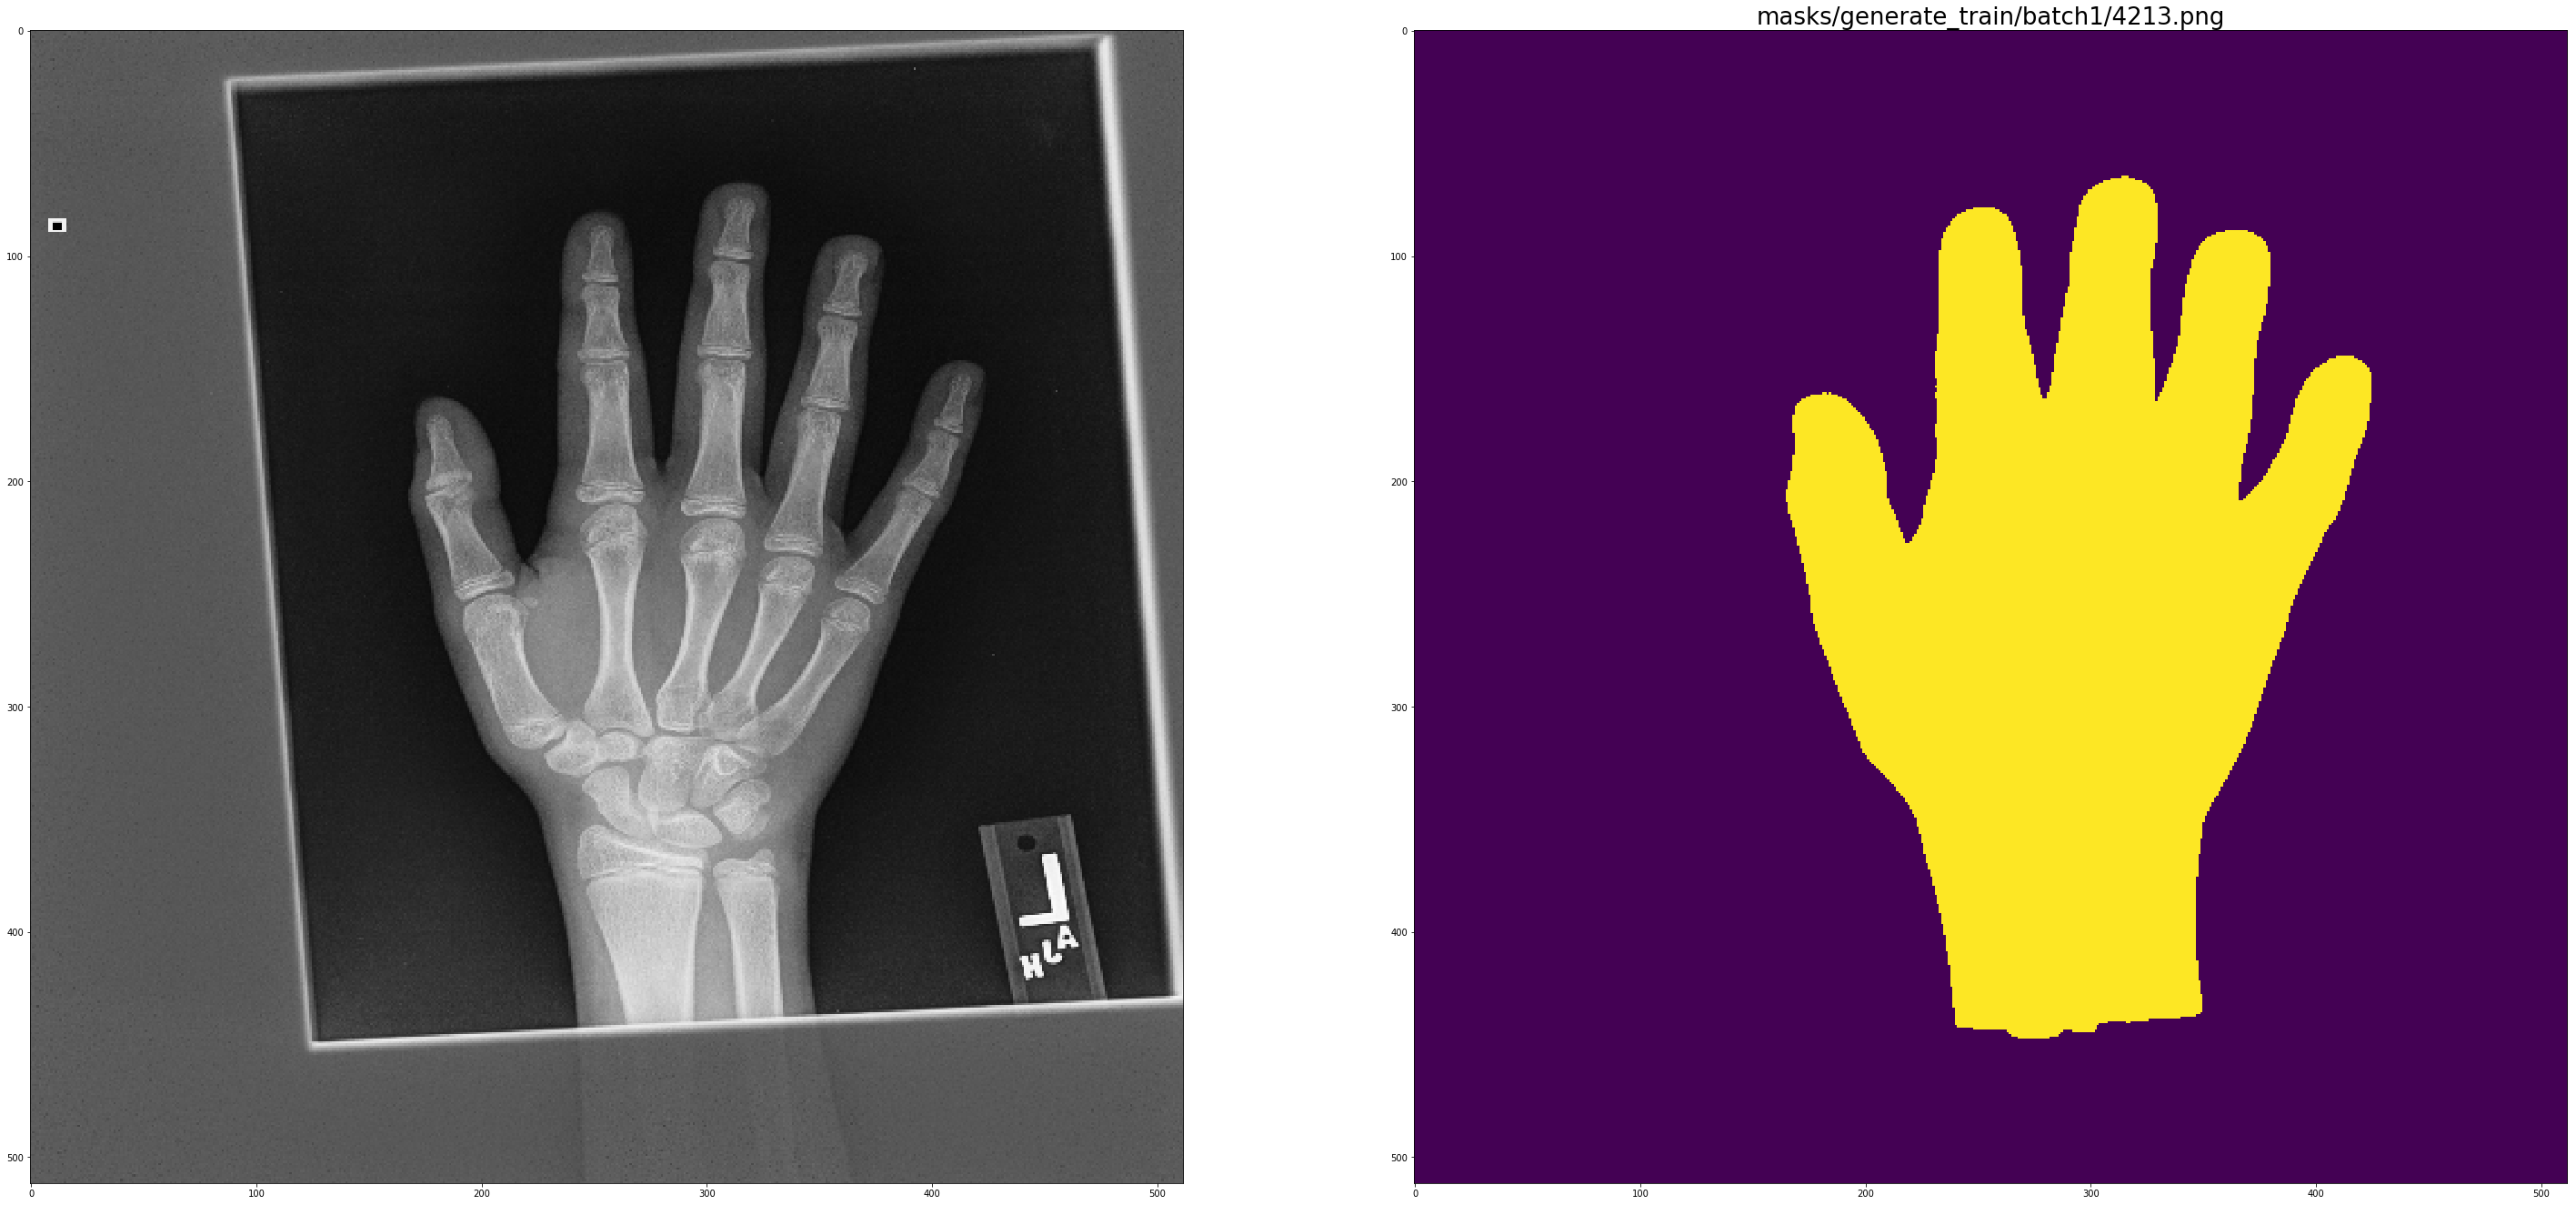

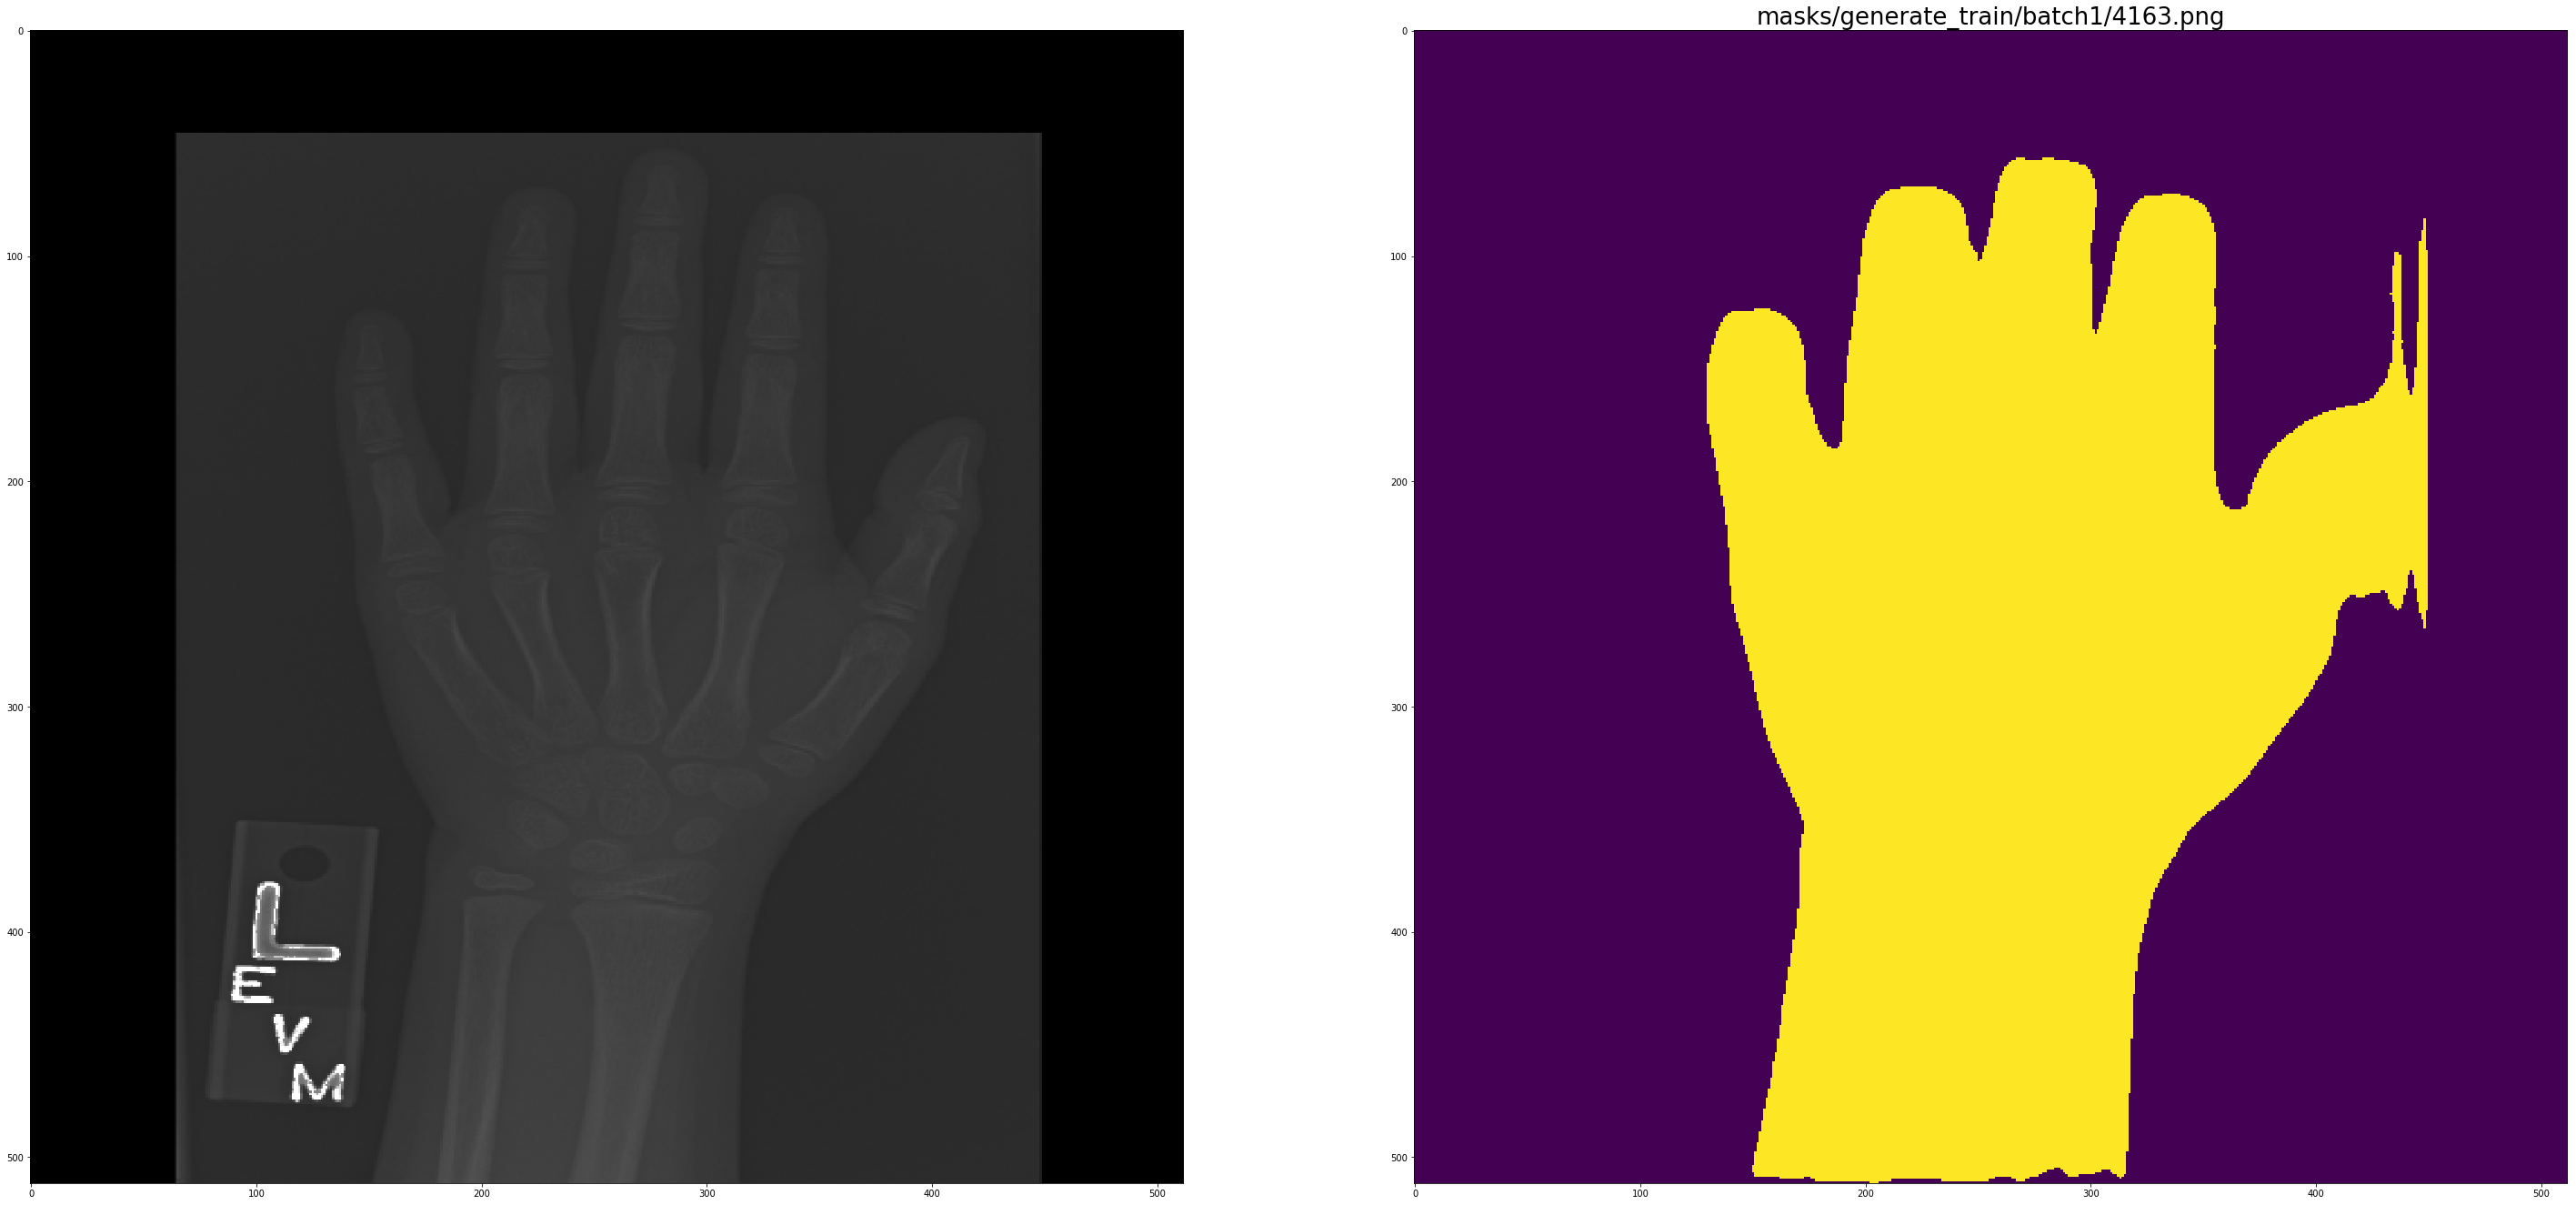

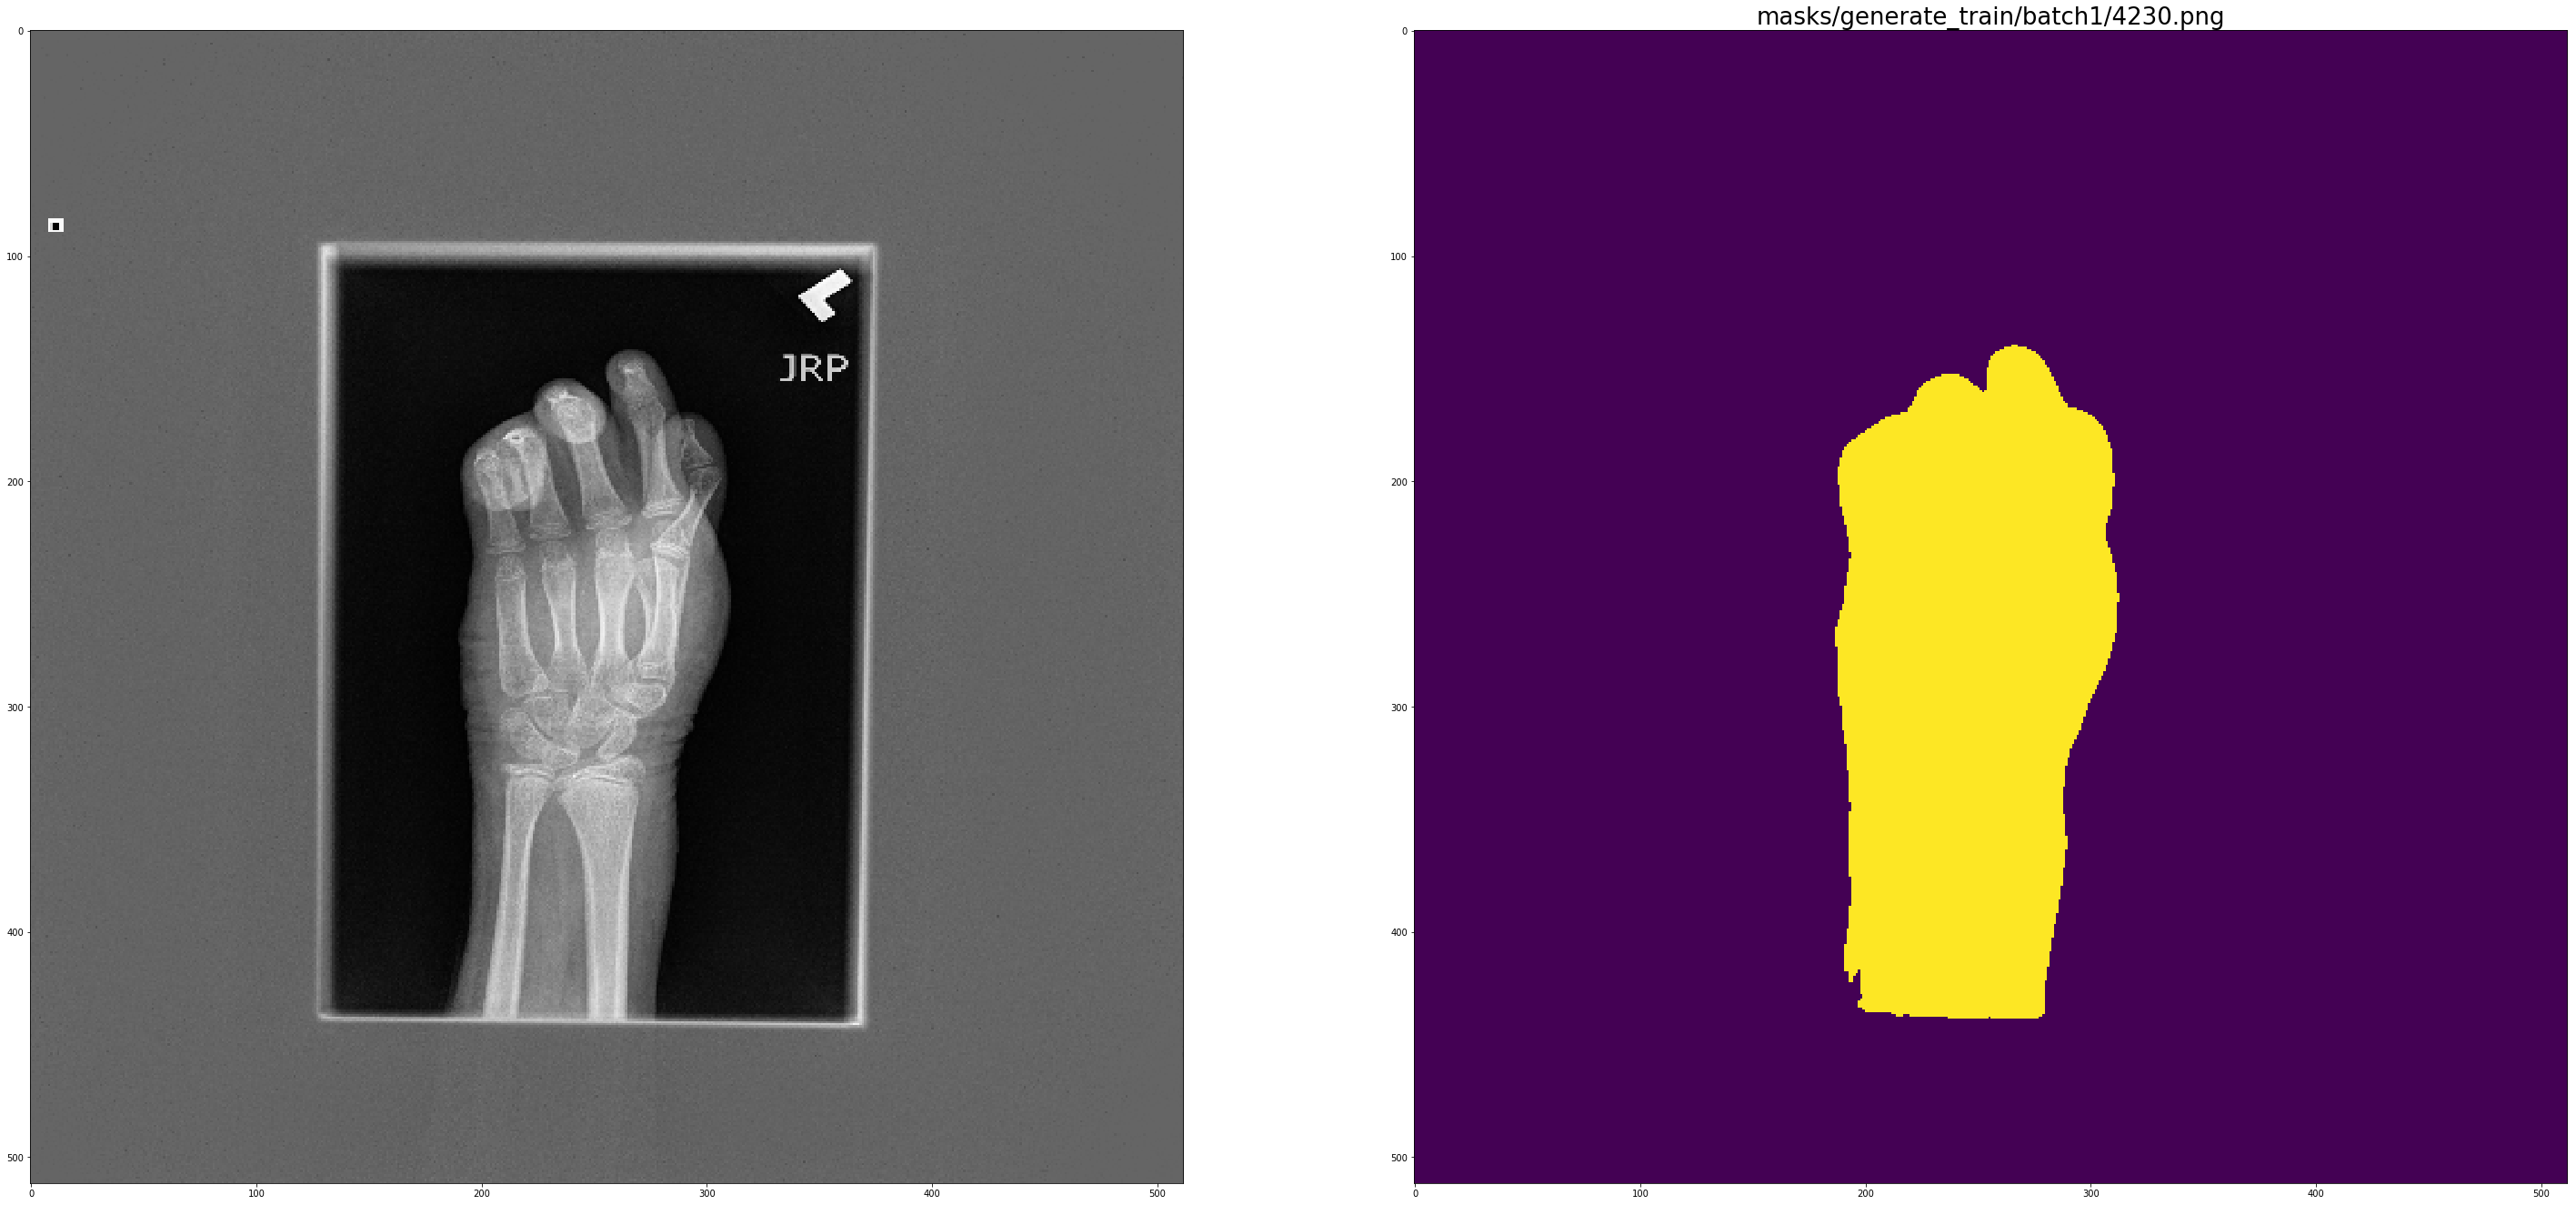

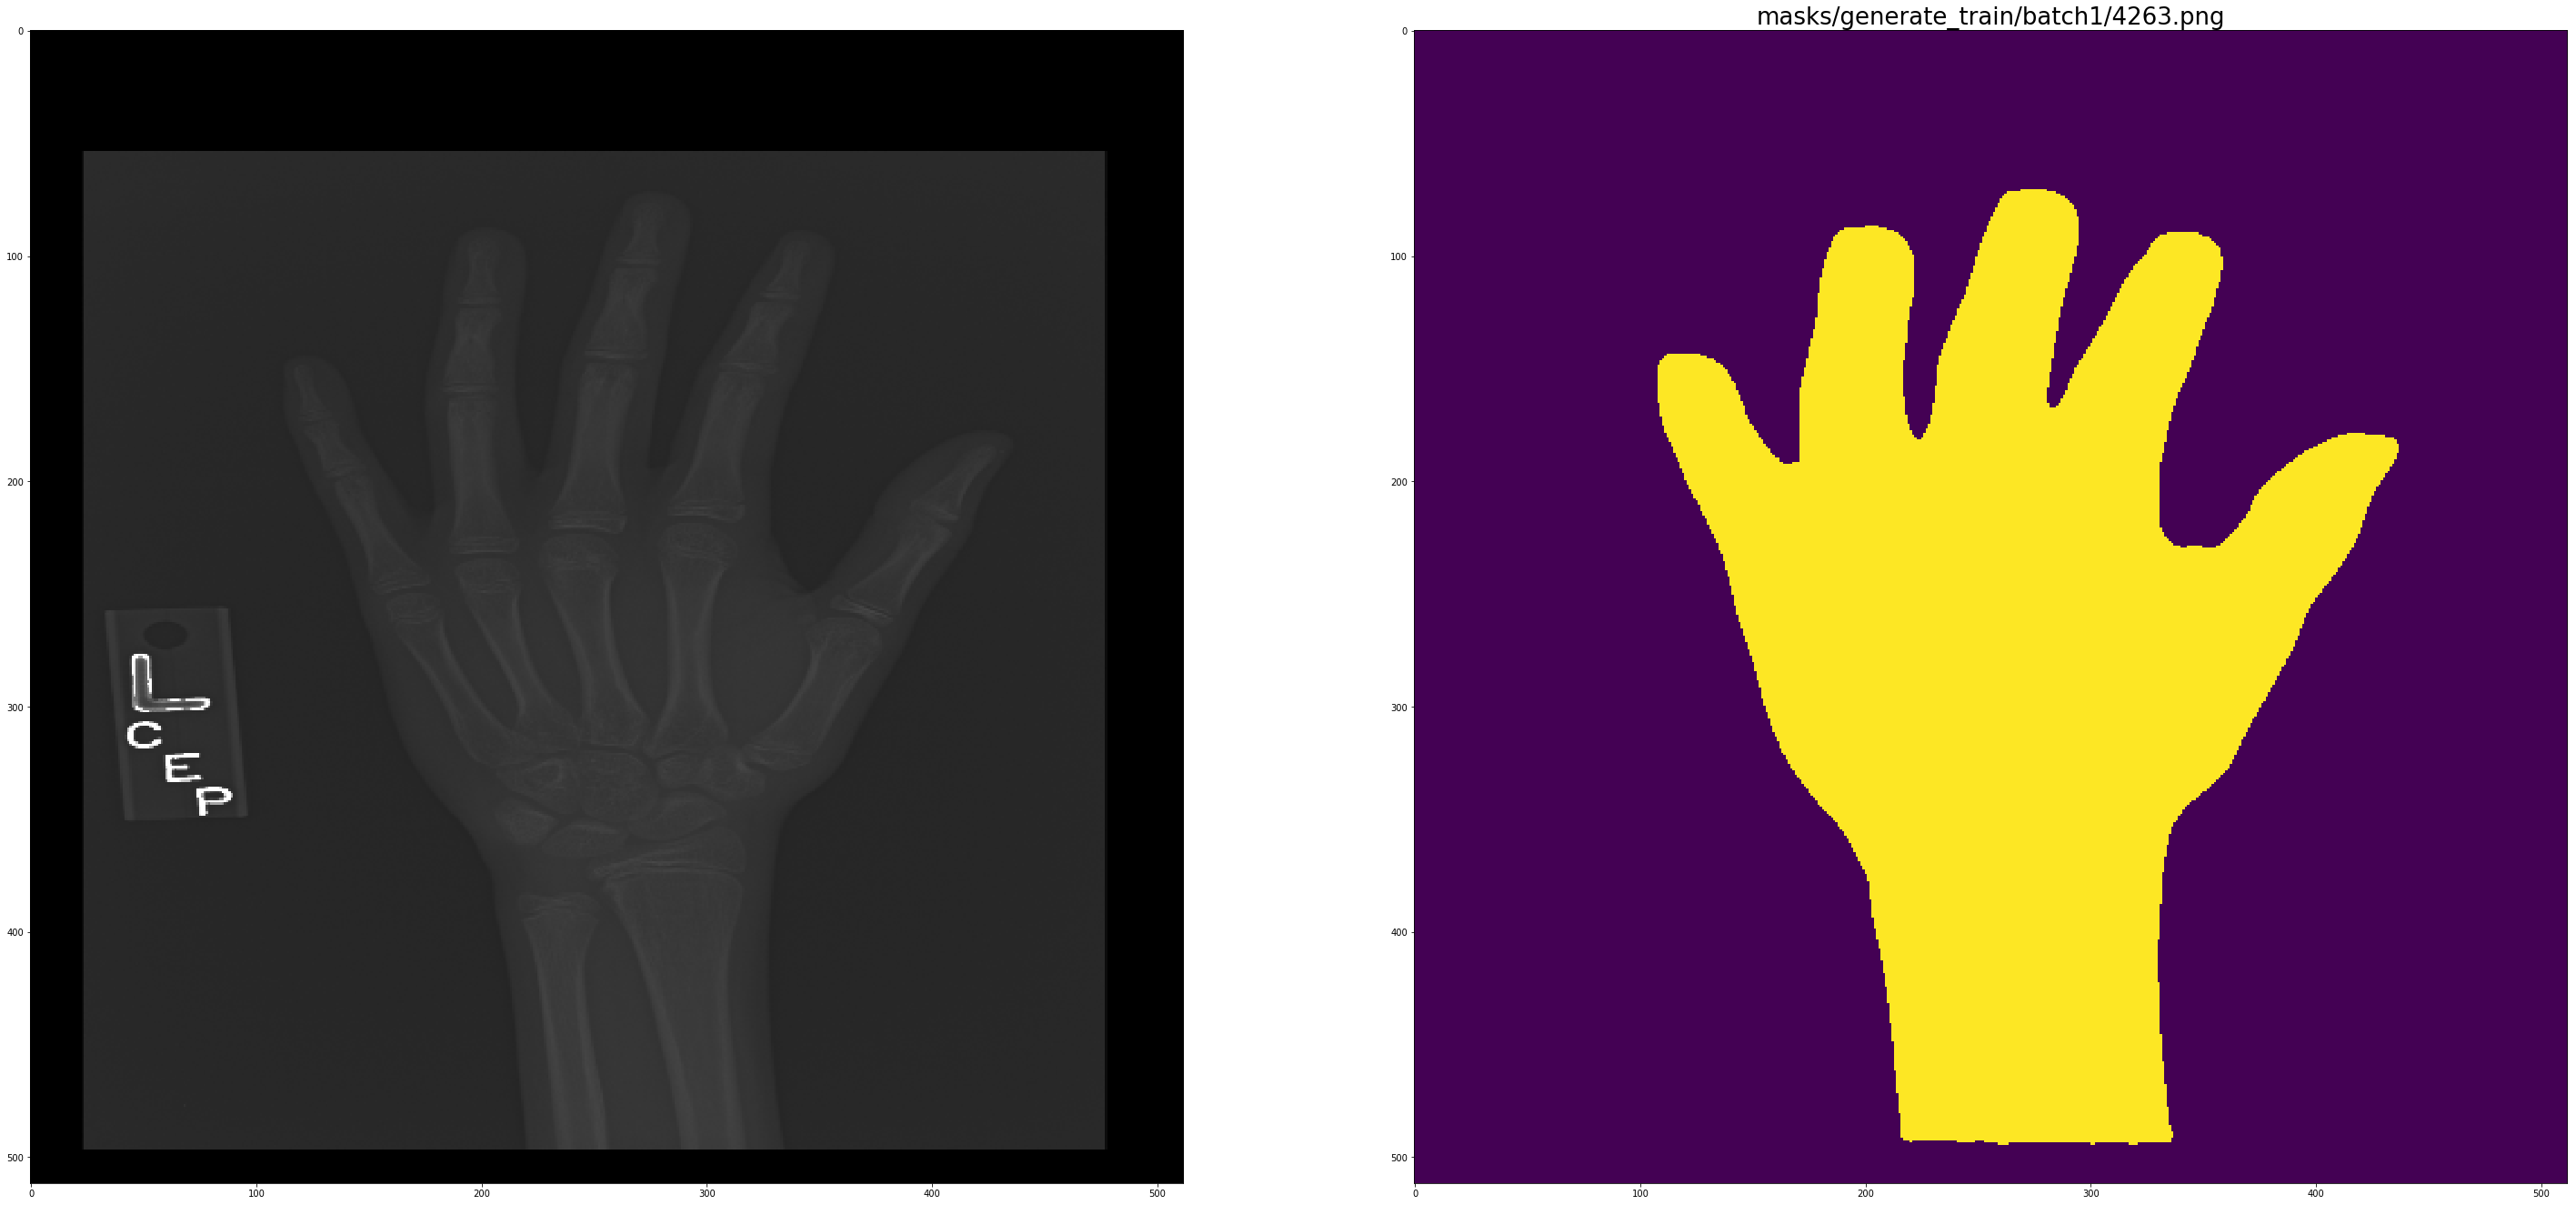

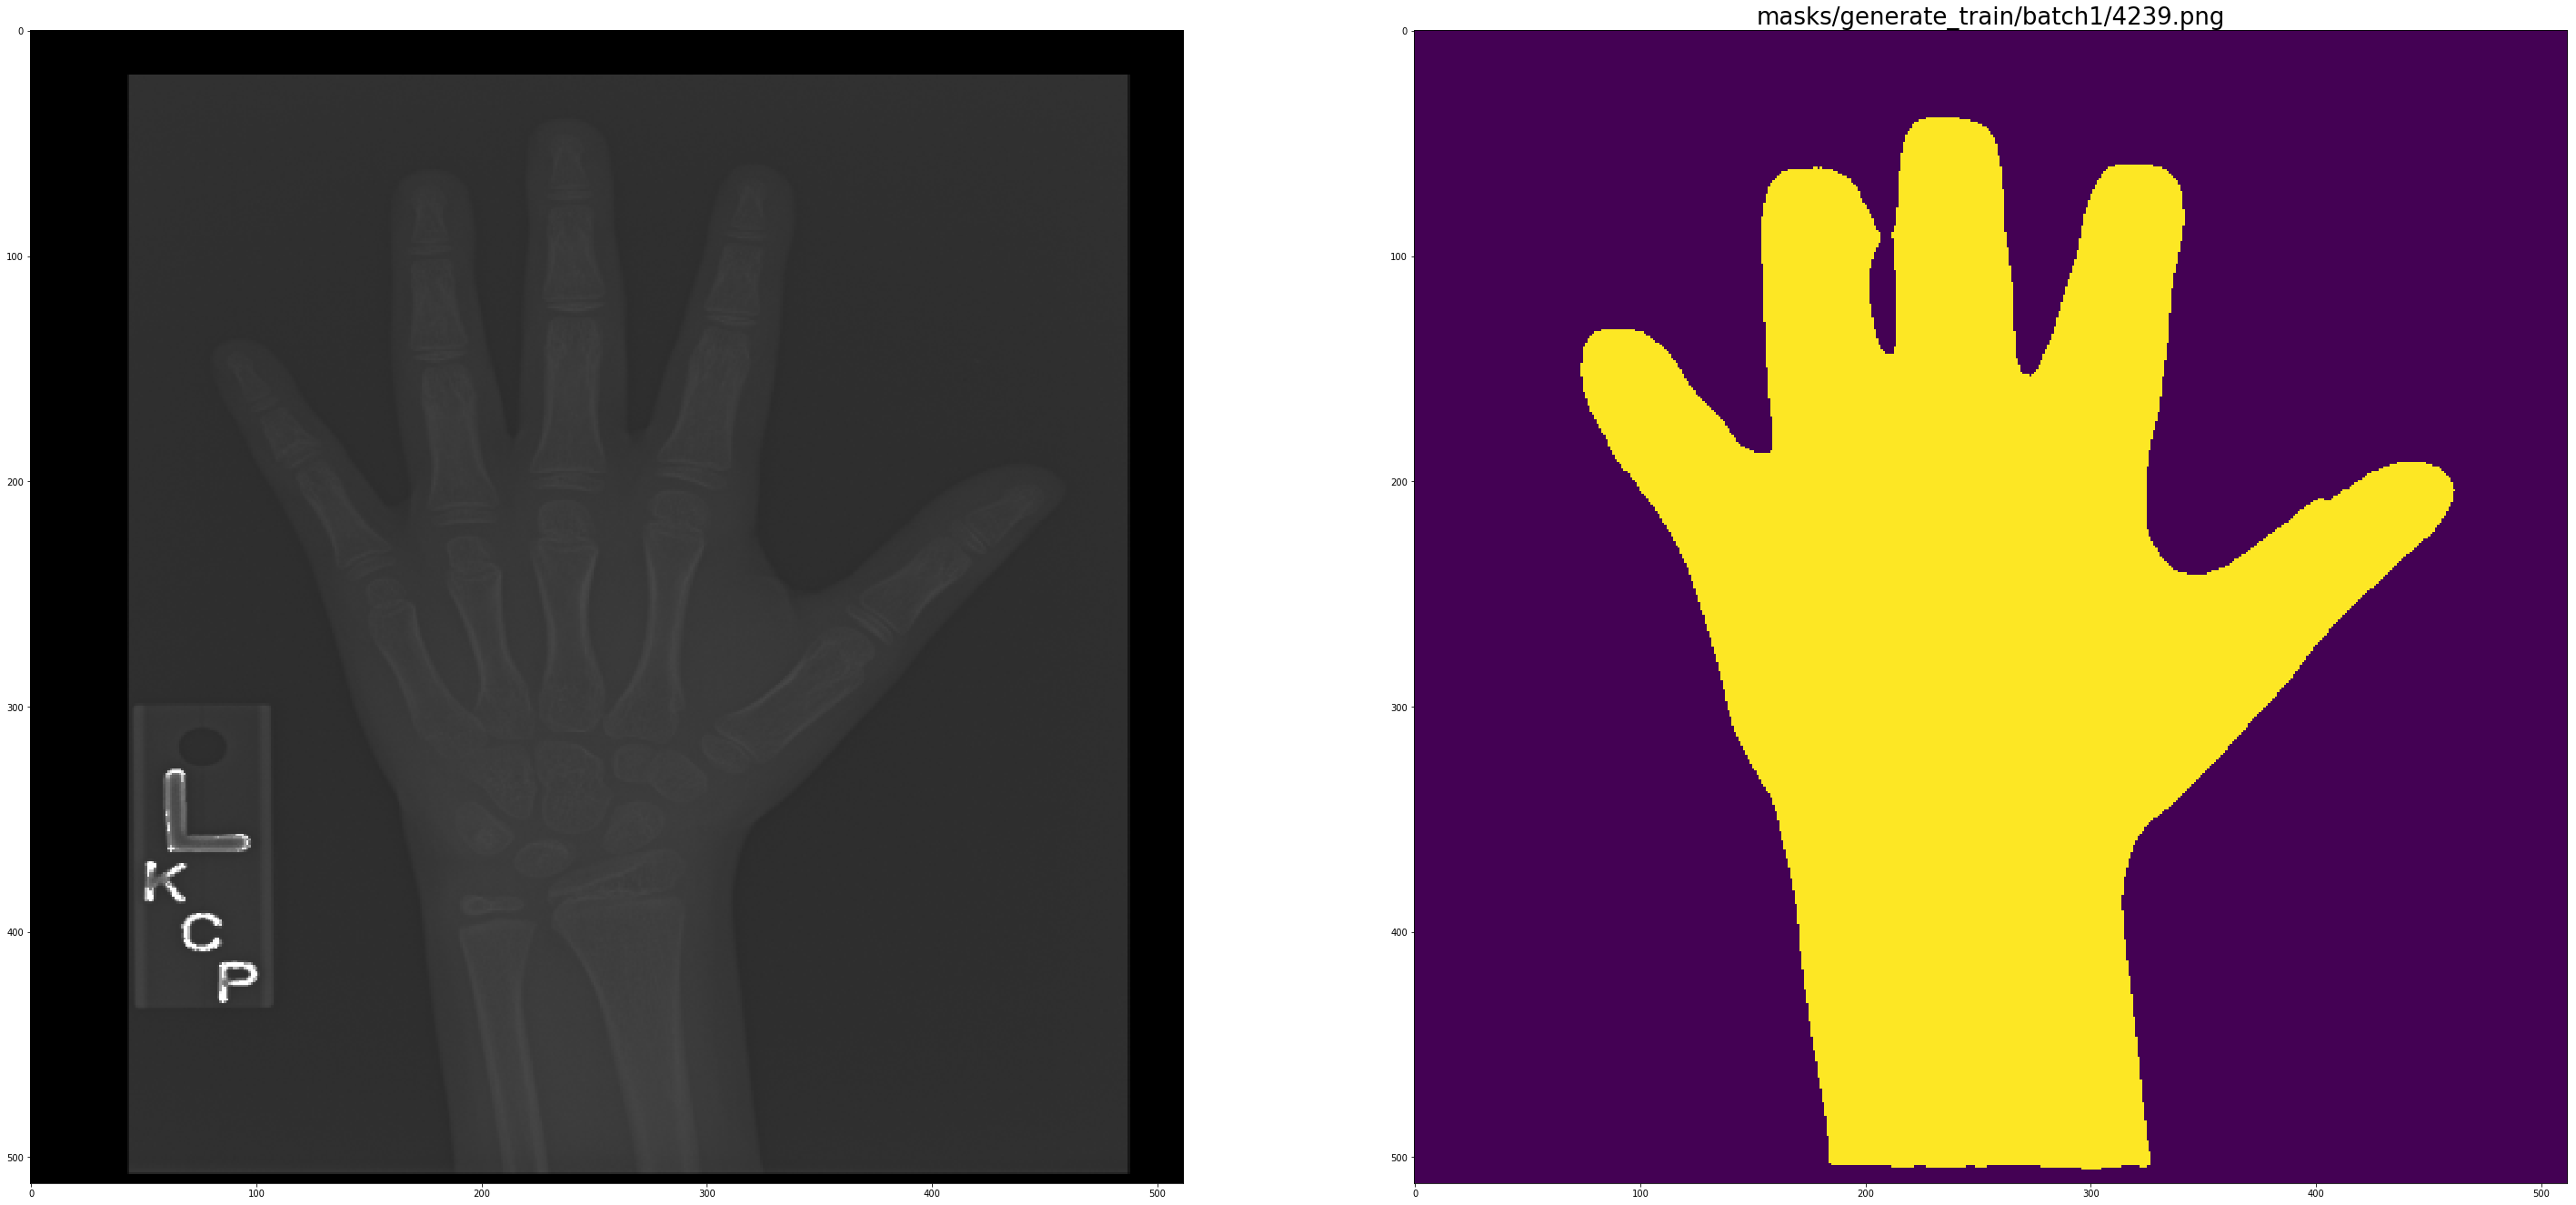

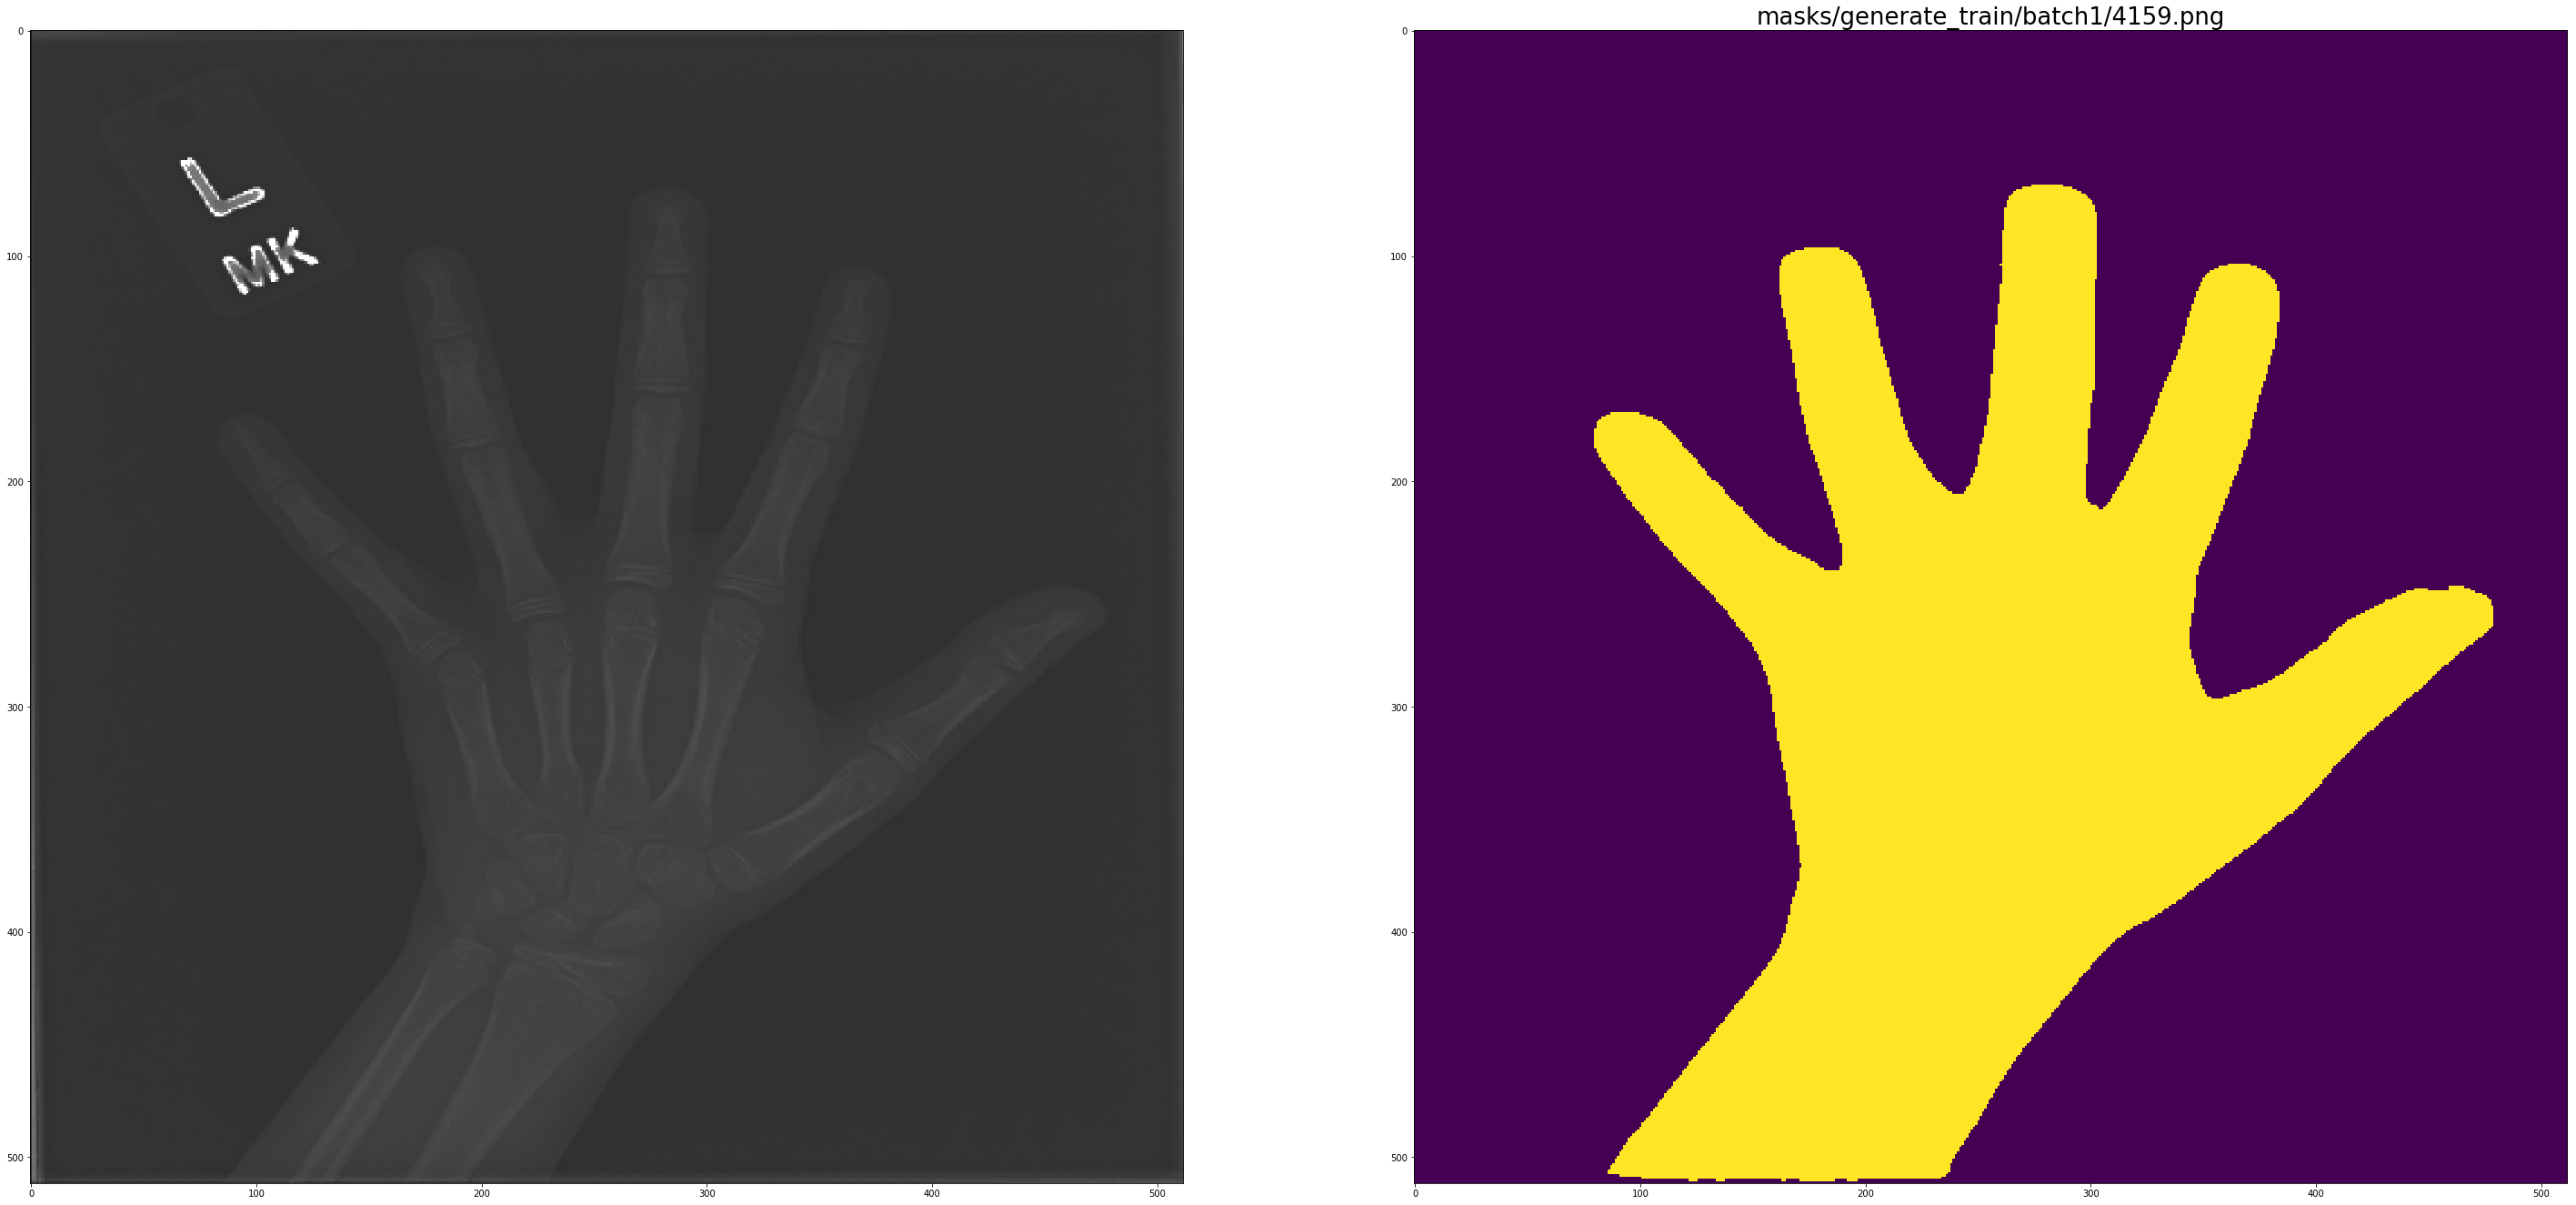

In [ ]:
import glob
count=0
image_size = 512
orig_path = "masks/generate_train/batch1/*"
mask_path = "masks/generate_output/batch1/"
orig = glob.glob(orig_path)
masks_array = np.array([])
masks_path = np.array([])
for fl in orig:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (image_size, image_size))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    #masks_path = np.append(masks_path,mask_path+os.path.basename(fl))
    #masks_array = np.append(masks_array,output_mask)
    #plotting originalmasks_array amd mask side by side
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(output_mask)
    plt.title(fl,fontsize=26)
    plt.show()


In [ ]:
output_mask.shape

In [ ]:
np.append(masks_array,output_mask)

In [ ]:
marks_array.shape

In [ ]:
masks_array[91226111]final.shape

In [ ]:
b= np.array([])

In [ ]:
b=np.append(a,np.array([output_mask]))

In [ ]:
a

In [ ]:
!ls

In [ ]:
orig_images = cv2.imread('1903.jpg')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
output_mask = preprocess(a, gray)
#fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
#fig.add_subplot(rows, columns, 1)
#plt.imshow(orig_images)
#fig.add_subplot(rows, columns, 2)
res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(res)
plt.show()


In [ ]:
orig_images = cv2.imread('4189.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 250, 255,0)
image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_areas[-1])
mask = np.zeros((512,512),dtype= np.uint8)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
image = cv2.bitwise_and(orig_images, orig_images, mask=mask)
roi=image[y-20:y+h+20,x-20:x+w+20]
roi=cv2.resize(roi,(512,512))
plt.imshow(roi)
plt.show()

lab= cv2.cvtColor(roi, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.show()
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
plt.imshow(l)
plt.show()

plt.imshow(a)
plt.show()

plt.imshow(b)

plt.show()
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow( cl)
plt.show()
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow(limg)
plt.show()
#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(final)
plt.show()

In [ ]:
largest_areas[-1]

In [ ]:
import cv2

#-----Reading the image-----------------------------------------------------
img = cv2.imread('4189.png', 1)
plt.imshow(img) 
plt.show()
#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.show()
#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
plt.imshow(l)
plt.show()

plt.imshow(a)
plt.show()

plt.imshow(b)

plt.show()
#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
plt.imshow( cl)
plt.show()
#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
plt.imshow(limg)
plt.show()
#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(final)
plt.show()

orig_images = final
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 250, 255,0)
image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_areas[-1])
mask = np.zeros((512,512),dtype= np.uint8)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
#roi=cv2.resize(roi,(512,512))

image = cv2.bitwise_and(orig_images, orig_images, mask=mask)
roi=image[y-20:y+h+20,x-20:x+w+20]
roi=cv2.resize(roi,(512,512))
plt.imshow(roi)
plt.show()

In [ ]:
orig_images = final
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
plt.imshow(a)
plt.show()

In [ ]:
a.shape

In [ ]:
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 250, 255,0)
image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_areas[-1])
mask = np.zeros((512,512),dtype= np.uint8)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)

#roi=cv2.resize(roi,(512,512))
plt.imshow(mask)
plt.show()

In [ ]:
# gg=plt.imread('1610.png')
# gg = cv2.resize(gg, (512, 512))
# plt.imshow(gg)
# plt.show()

import cv2

#-----Reading the image-----------------------------------------------------
img = cv2.imread('4189.png', 1)
plt.imshow(cv2.resize(img, (512, 512))) 
plt.show()